In [3]:
# IMPORTS
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
import cufflinks as cf
init_notebook_mode(connected = True)
cf.go_offline()

In [4]:
# SOURCE: Retrieved 05/08/2022 - Data over 04-25 - 05/06 
# https://www.asias.faa.gov/apex/f?p=100:93:::NO:::

In [5]:
# ONLY MAINLAND USA
df0 = pd.read_csv("faa_ai_prelim.csv")
df1 = df0[df0["LOC_CNTRY_NAME"]=="UNITED STATES"]

In [6]:
# Converting State name to abbreviation: adding a new Column
codes = {
    'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME'}
df1["CODE"] = df1["LOC_STATE_NAME"].str.title().apply(lambda x: codes[x])

In [7]:
# A&I per state
ais = pd.DataFrame(df1.groupby("CODE")["CODE"].count())
ais.columns = ["Count"]
ais1 = ais.reset_index()
ais1 ["text"] = ais1["CODE"]+": "+ais1["Count"].apply(str)+" A&I's"
# choropleth map of state A&I
data = dict(type = "choropleth",
           locations = ais1["CODE"],
           locationmode = "USA-states",
           z = ais1["Count"].astype(float),
           text = ais1["text"],
           colorbar={"title":"A&I"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(0,0,0)")) )
layout = dict(title = "Total State Aviation Accidents and Incidents",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)", landcolor = "white"))

choro = go.Figure(data, layout)
iplot(choro)

In [8]:
# Top 3 States with A&I
df1["LOC_STATE_NAME"].value_counts().head(3)

TEXAS         10
FLORIDA        9
CALIFORNIA     6
Name: LOC_STATE_NAME, dtype: int64

In [9]:
# Total A&I with Fatality
aif = df1[df1["MAX_INJ_LVL"]=="FATAL"]
aif["totalfatal"] = aif["PAX_INJ_FATAL"]+aif["GRND_INJ_FATAL"]+aif["CBN_CRW_INJ_FATAL"]+aif["FLT_CRW_INJ_FATAL"]
aif["text"] = aif["CODE"]+": "+aif["totalfatal"].apply(str)
# choropleth map of state A&I
data1 = dict(type = "choropleth",
           locations = aif["CODE"],
           locationmode = "USA-states",
           z = aif["totalfatal"].astype(float),
           text = aif["text"],
           colorbar={"title":"Fatalities"},
           colorscale = "oranges",
           marker = dict(line = dict(color = "rgb(0,0,0)")) )
layout1 = dict(title = "Total Fatalities in Aviation Accidents and Incidents",
              geo = dict(scope = "usa",showlakes = True, lakecolor = "rgb(255,255,255)", landcolor = "lightgrey"))

choro1 = go.Figure(data1, layout1)
iplot(choro1)

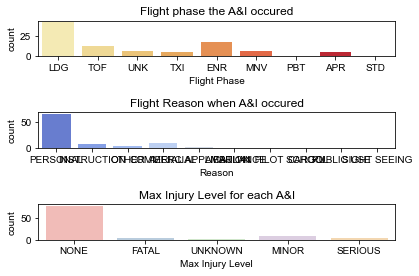

In [10]:
# During which flight phase was the A&I: new column and countplot + Flight reason and max injury level 
df1["phase"] = df1["FLT_PHASE"].apply(lambda x:x.split("(")[1]).apply(lambda x:x.split(")")[0])
fig, axs = plt.subplots(nrows=3)
sns.countplot(ax = axs[0], x = df1["phase"], palette = "YlOrRd").set(title = "Flight phase the A&I occured", xlabel = "Flight Phase")
sns.countplot(ax=axs[1], x = df1["FLT_ACTIVITY"], palette = "coolwarm").set(title = "Flight Reason when A&I occured", xlabel = "Reason")
sns.countplot(ax = axs[2], x = df1["MAX_INJ_LVL"], palette = "Pastel1").set(title = "Max Injury Level for each A&I", xlabel = "Max Injury Level")
sns.set(rc={'figure.figsize':(20,20)})
plt.tight_layout()

In [11]:
# Convert to DateTime String and split by hour, month, and day of week: new columns
df1["datetime"] = pd.to_datetime(df1["EVENT_LCL_DATE"]+" "+df1["EVENT_LCL_TIME"].apply(lambda x:x.split("Z")[0]))
df1["dayofweek"] = df1["datetime"].apply(lambda x: x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df1["dayofweek"] = df1["dayofweek"].map(dmap)
df1["hour"] = df1["datetime"].apply(lambda x: x.hour)
df1["month"] = df1["datetime"].apply(lambda x: x.month)
df1.head(2)

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK,CODE,phase,datetime,dayofweek,hour,month
0,No,3-May-22,2-May-22,14:30:00Z,PHOENIX,ARIZONA,UNITED STATES,"AIRCRAFT GROUND LOOPED ON LANDING, PHOENIX, AZ.",ACCIDENT,SCOTTSDALE FSDO,...,0,0,0,0,AZ,LDG,2022-05-02 14:30:00,Mon,14,5
1,No,3-May-22,2-May-22,22:53:00Z,ORLANDO,FLORIDA,UNITED STATES,"AIRCRAFT LANDED AND STRUCK A TAXIWAY LIGHT, OR...",INCIDENT,ORLANDO FSDO,...,0,0,0,0,FL,LDG,2022-05-02 22:53:00,Mon,22,5


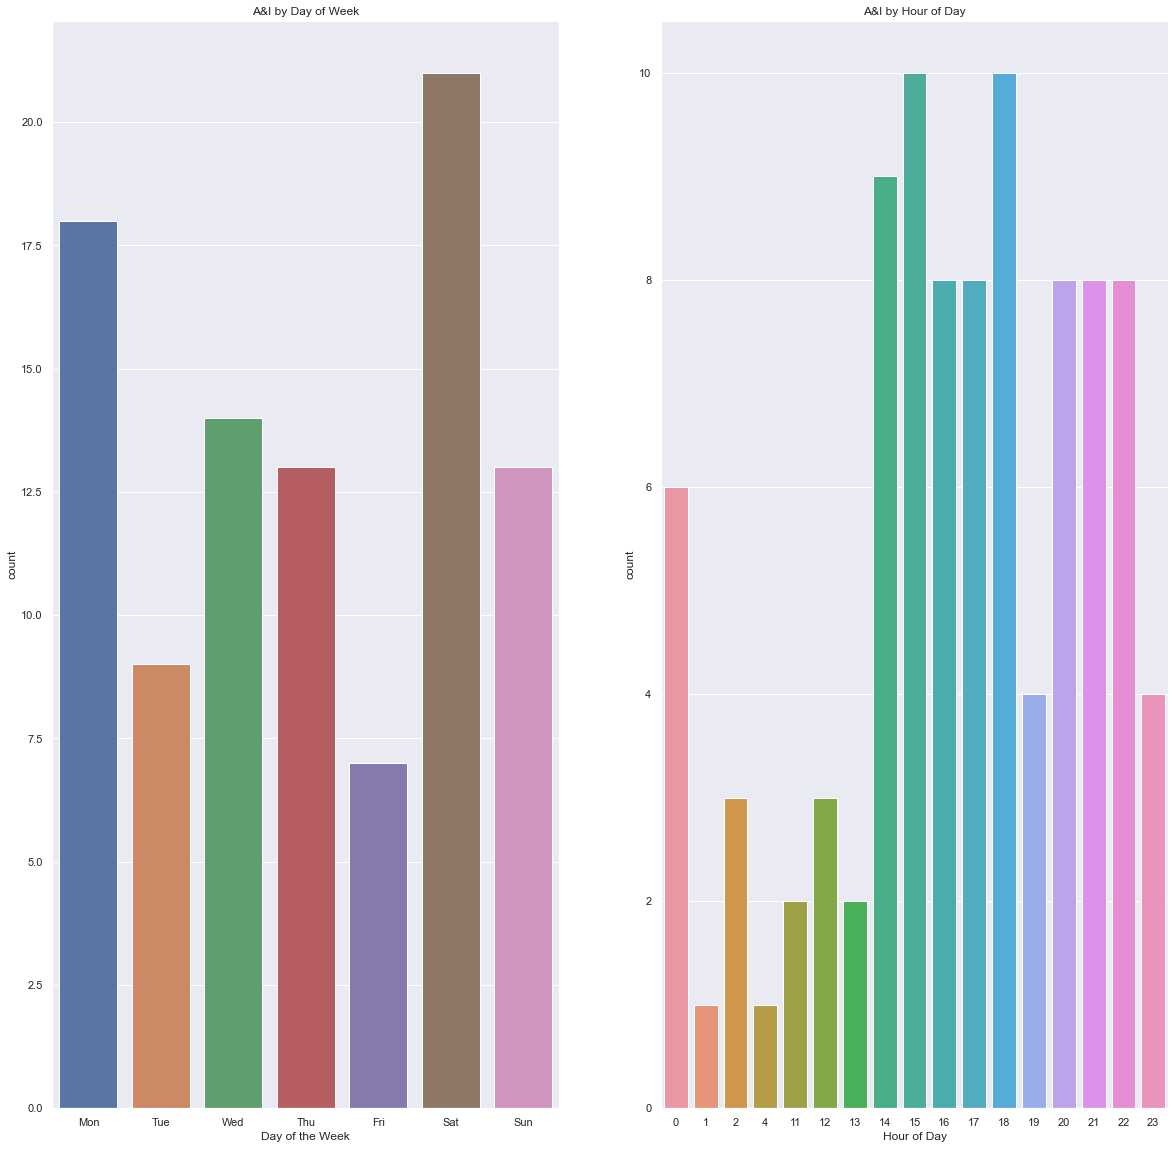

In [12]:
# A& by Day of the Week and Hour of the Day
fig, axs = plt.subplots(ncols=2)
sns.countplot(x = "dayofweek",data = df1, order = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], ax = axs[0]).set(title = "A&I by Day of Week", xlabel = "Day of the Week")
sns.countplot(x = "hour",data = df1,ax = axs[1]).set(title = "A&I by Hour of Day", xlabel = "Hour of Day")
sns.set(rc={'figure.figsize':(20,12)})

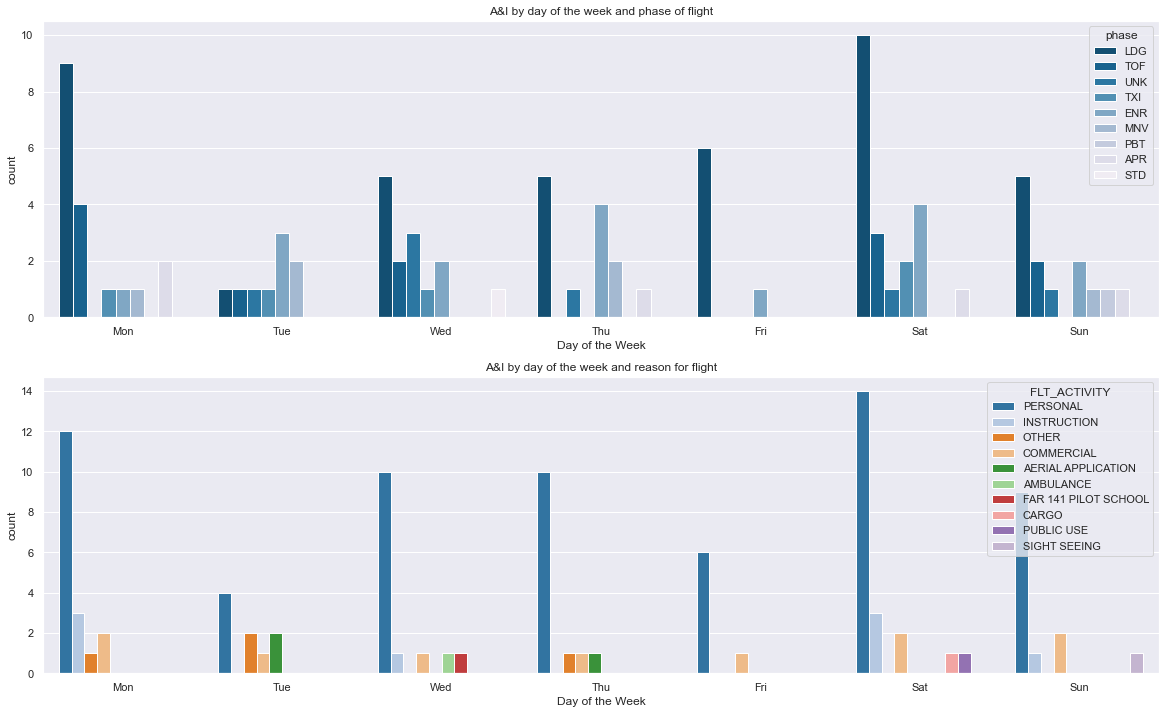

In [13]:
# Countplot for day of the week A&I, split by phase of flight when A&I occured and reason for flight
fig, axs = plt.subplots(nrows=2)
sns.countplot(ax = axs[0], x = "dayofweek",data = df1, hue = "phase", palette = "PuBu_r",order = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]).set(title = "A&I by day of the week and phase of flight", xlabel = "Day of the Week")
sns.countplot(ax = axs[1], x = "dayofweek",data = df1, hue = "FLT_ACTIVITY", palette = "tab20",order = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]).set(title = "A&I by day of the week and reason for flight", xlabel = "Day of the Week")
sns.set(rc={'figure.figsize':(20,12)})

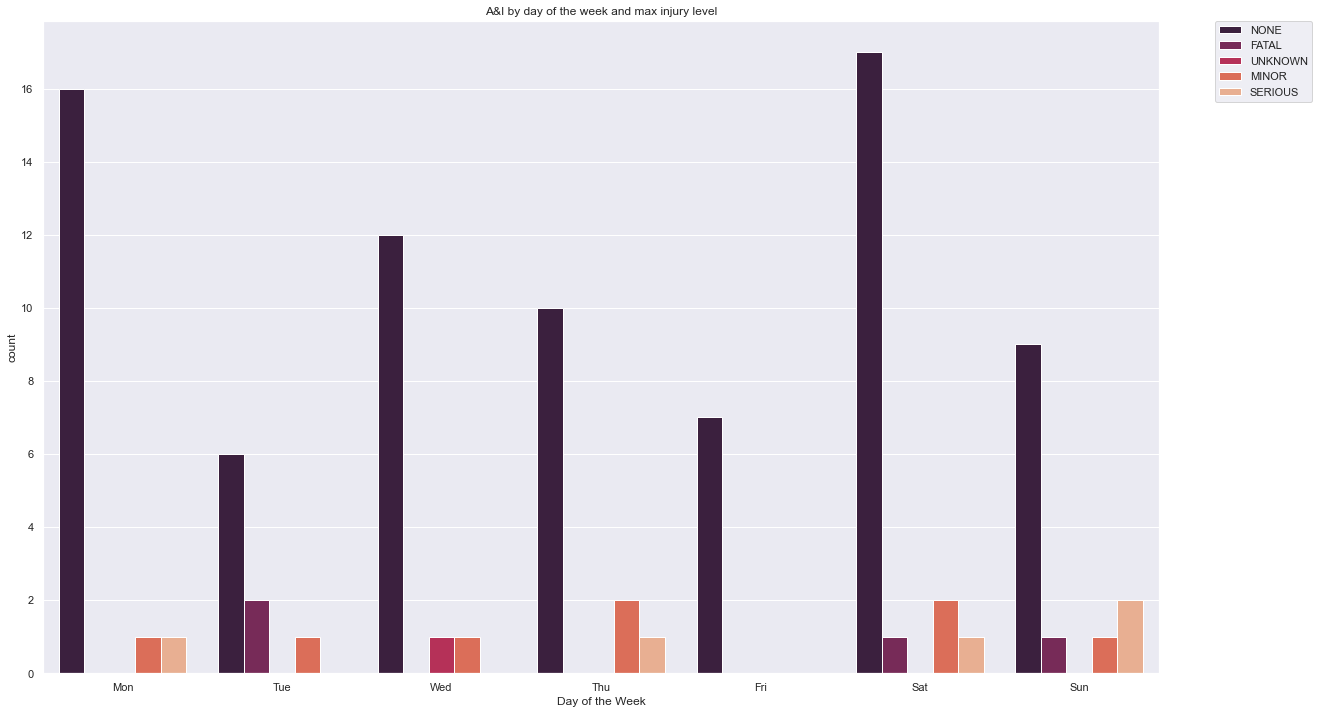

In [14]:
# Countplot for day of the week A&I, split by maximum injury
sns.countplot(x = "dayofweek",data = df1, hue = "MAX_INJ_LVL", palette = "rocket",order = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]).set(title = "A&I by day of the week and max injury level", xlabel = "Day of the Week")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

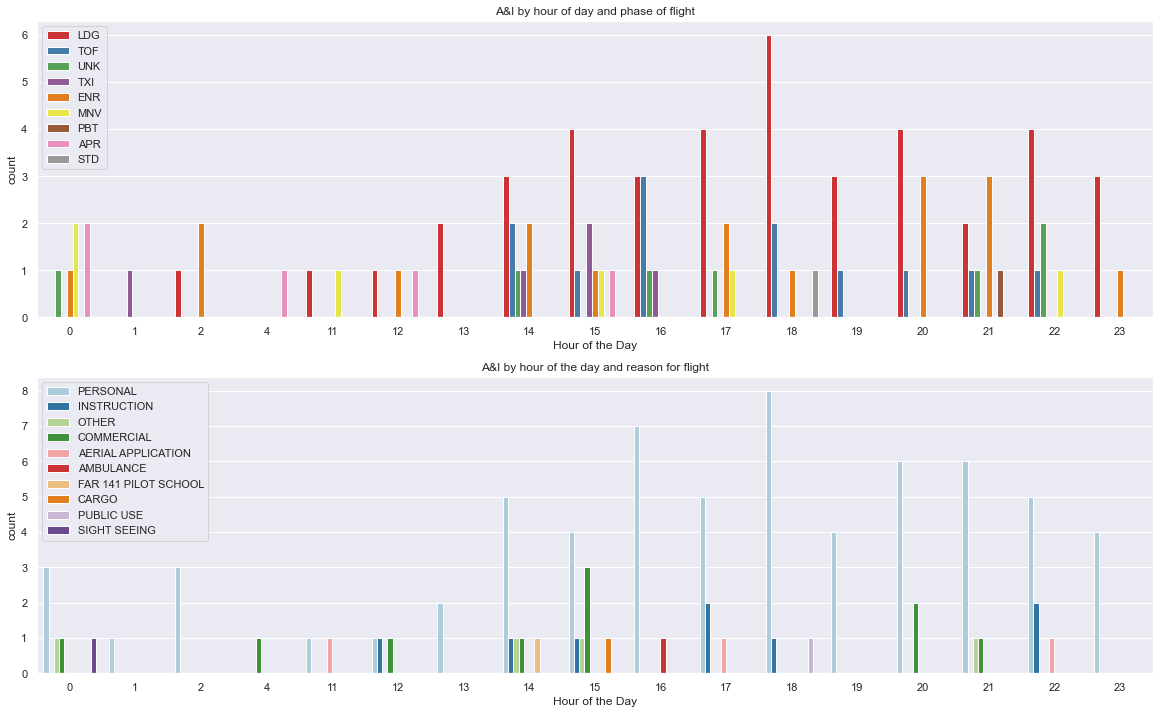

In [15]:
# Countplot for hour of the day A&I, split by phase of flight when A&I occured and reason for flight
fig, axs = plt.subplots(nrows=2)
sns.countplot(ax = axs[0], x = "hour",data = df1, hue = "phase", palette = "Set1").set(title = "A&I by hour of day and phase of flight", xlabel = "Hour of the Day")
sns.countplot(ax = axs[1], x = "hour",data = df1, hue = "FLT_ACTIVITY", palette = "Paired").set(title = "A&I by hour of the day and reason for flight", xlabel = "Hour of the Day")
axs[0].legend(loc = "upper left")
axs[1].legend(loc = "upper left")
sns.set(rc={'figure.figsize':(20,12)})

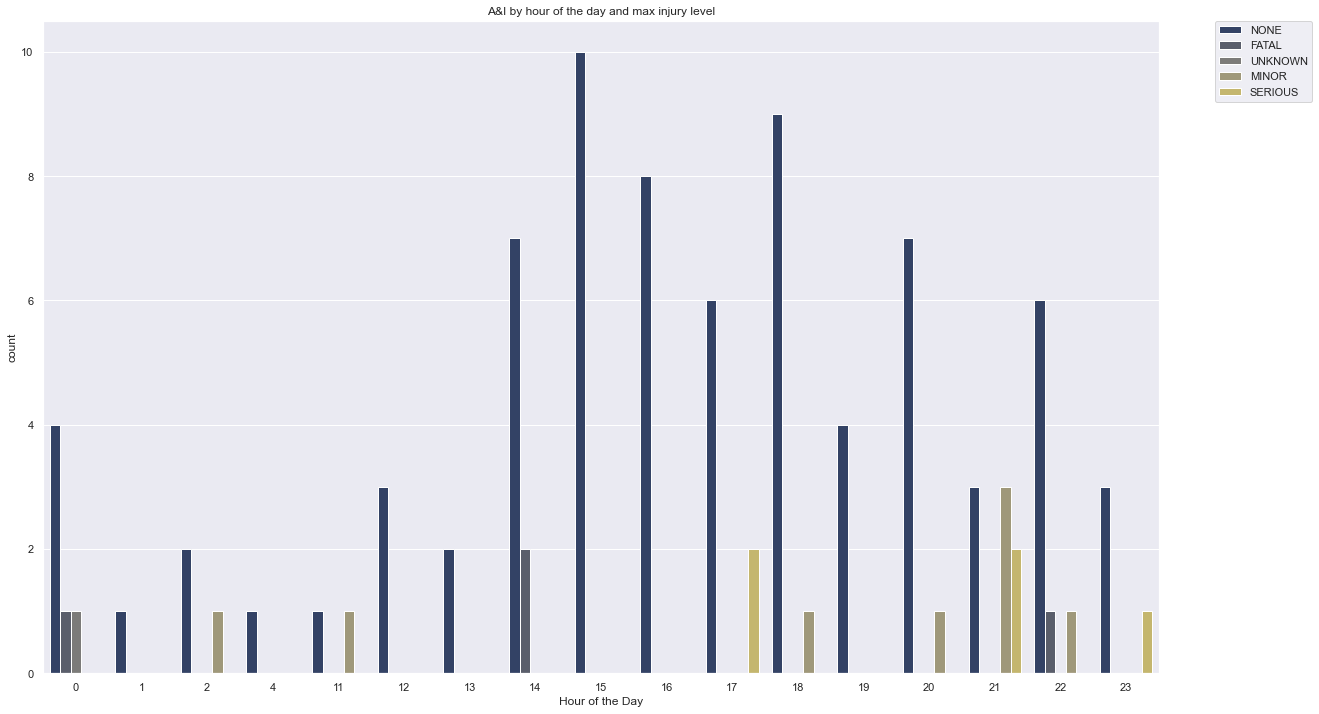

In [16]:
# Countplot for day of the week A&I, split by maximum injury
sns.countplot(x = "hour",data = df1, hue = "MAX_INJ_LVL", palette = "cividis").set(title = "A&I by hour of the day and max injury level", xlabel = "Hour of the Day")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(20,12)})

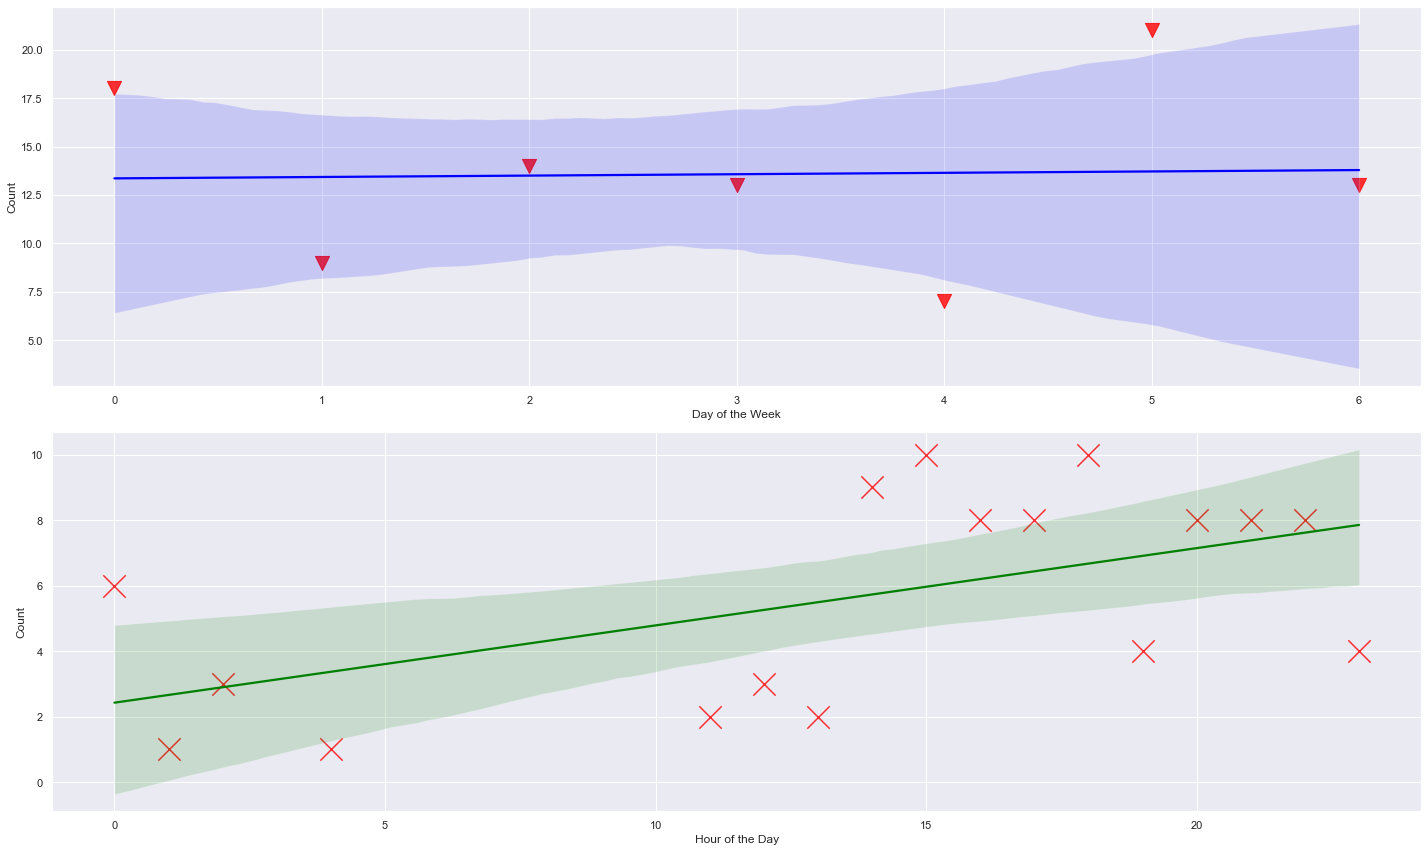

In [17]:
# lmplot for Day of Week and A&I and Hour of the day and A&I
df2 = df1.groupby("dayofweek").count().reset_index()
df2["dayn"] = [4,0,5,6,3,1,2]
df3 = df1.groupby("hour").count().reset_index()
fig, axs = plt.subplots(nrows=2)
sns.regplot(ax = axs[0], x = "dayn", y = "phase", data = df2, marker = "v", color = "red", line_kws={"color":"blue"}, scatter_kws={"s":200}).set(xlabel="Day of the Week", ylabel = "Count")
sns.regplot(ax = axs[1], x = "hour", y = "phase", data = df3, marker = "x", color = "red", line_kws = {"color":"green"}, scatter_kws={"s":500}).set(xlabel="Hour of the Day", ylabel = "Count")
sns.set(rc={'figure.figsize':(20,12)})
plt.tight_layout()

In [18]:
# Pearson's R for time of day and hour of day with Aviation A&I
from scipy.stats import pearsonr
r1 = pearsonr(df2["dayn"],df2["phase"])
r2 = pearsonr(df3["hour"],df3["phase"])
print("The Day of the Week and the amount of A&I has a correlation of "+str(r1[0].round(2))+", with a P value of "+str(r1[1].round(2))+"\nwhile the Hour of the Day and the amount of A&I has a correlation of "+str(r2[0].round(2))+", with a P value of "+str(r2[1].round(2)))

The Day of the Week and the amount of A&I has a correlation of 0.03, with a P value of 0.95
while the Hour of the Day and the amount of A&I has a correlation of 0.55, with a P value of 0.02


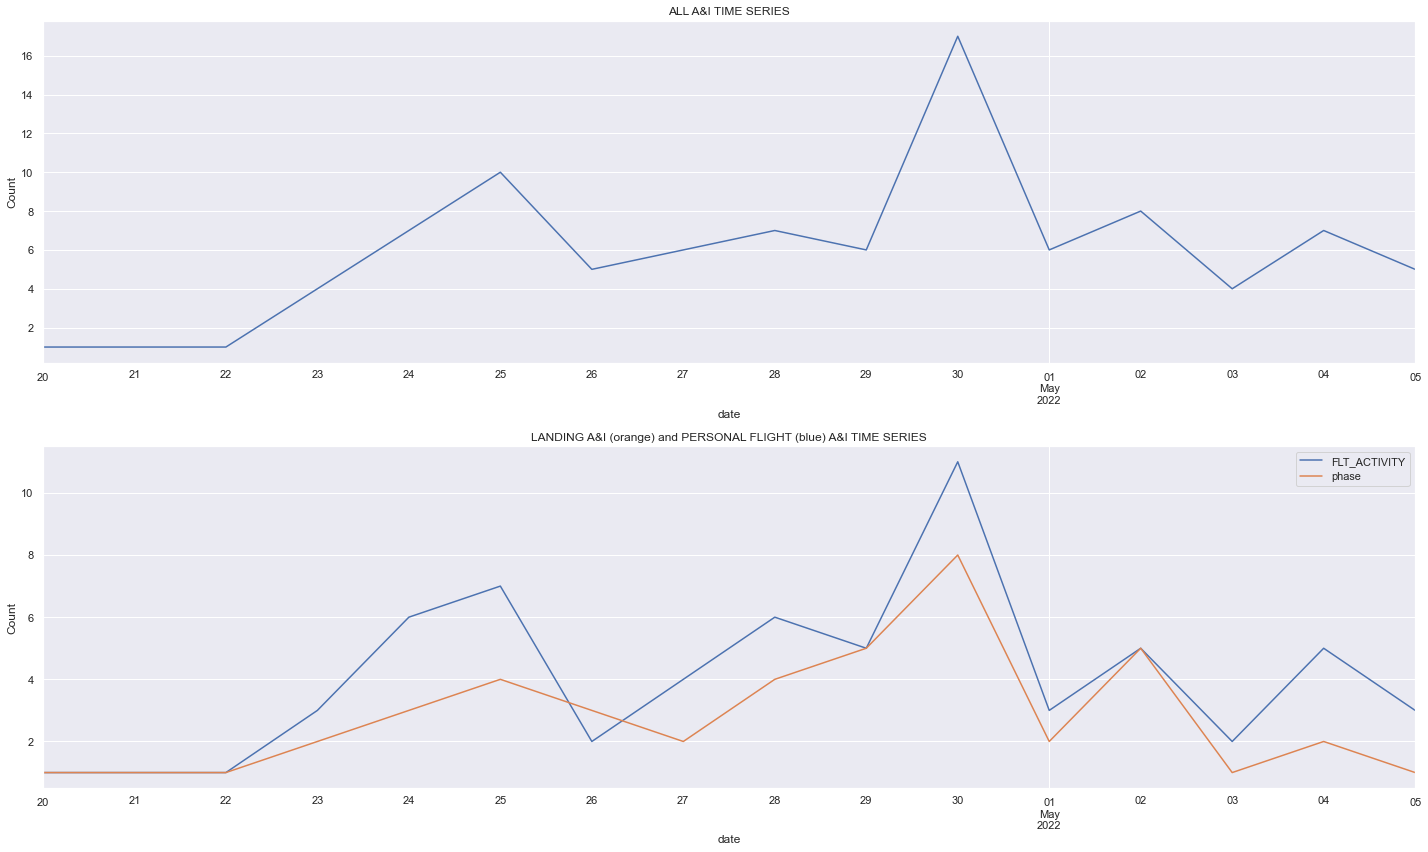

In [19]:
# Time series plot for A&I, for personal flights, and for landing phase flights
df1["date"] = pd.to_datetime(df1["EVENT_LCL_DATE"])
fig, axs = plt.subplots(nrows=2)
df1.groupby("date").count()["phase"].plot(ax = axs[0], title = "ALL A&I TIME SERIES", ylabel="Count")
df1[df1["FLT_ACTIVITY"]=="PERSONAL"].groupby("date").count()["FLT_ACTIVITY"].plot(ax = axs[1],legend = True)
df1[df1["phase"]=="LDG"].groupby("date").count()["phase"].plot(ax = axs[1], title = "LANDING A&I (orange) and PERSONAL FLIGHT (blue) A&I TIME SERIES", ylabel="Count", legend = True)
sns.set(rc={'figure.figsize':(12,9)})
plt.tight_layout()

In [20]:
# Creating Matrix by Hours and Day of the Week
matrix = df1.groupby("hour")["dayofweek"].value_counts().unstack("hour").fillna(0)
matrix.head(5)

hour,0,1,2,4,11,12,13,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,
Fri,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
Mon,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0,2.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0
Sat,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,2.0,1.0,1.0,4.0,1.0,3.0,1.0,2.0,1.0
Sun,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0
Thu,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,1.0,0.0,2.0,1.0,0.0,0.0


<AxesSubplot:xlabel='hour', ylabel='dayofweek'>

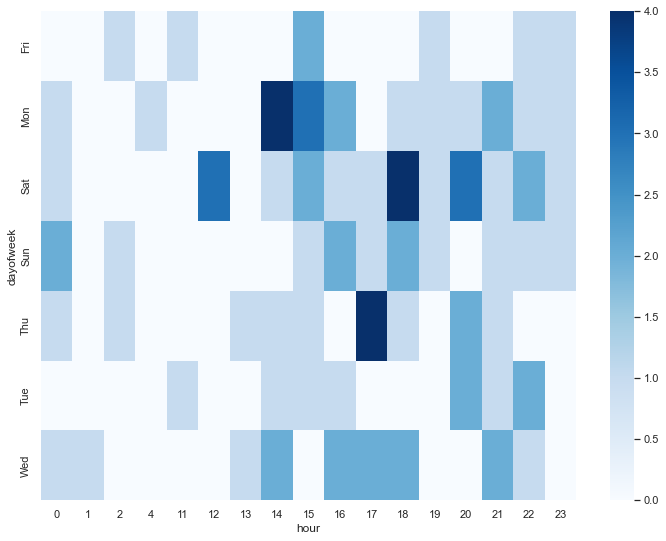

In [21]:
sns.heatmap(matrix, cmap = "Blues")

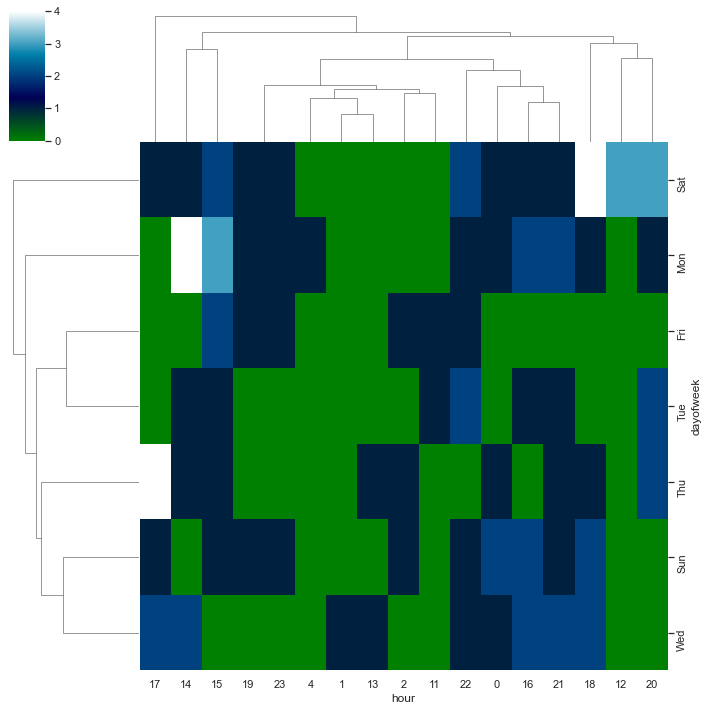

In [22]:
sns.clustermap(matrix, cmap = "ocean")

In [23]:
# New columns, adding up the none, minor, serious, fatal, and unknown injuries
df1["none"]= df1["FLT_CRW_INJ_NONE"]+df1["CBN_CRW_INJ_NONE"]+df1["PAX_INJ_NONE"]+df1["GRND_INJ_NONE"]
df1["minor"]= df1["FLT_CRW_INJ_MINOR"]+df1["CBN_CRW_INJ_MINOR"]+df1["PAX_INJ_MINOR"]+df1["GRND_INJ_MINOR"]
df1["serious"]= df1["FLT_CRW_INJ_SERIOUS"]+df1["CBN_CRW_INJ_SERIOUS"]+df1["PAX_INJ_SERIOUS"]+df1["GRND_INJ_SERIOUS"]
df1["fatal"]= df1["FLT_CRW_INJ_FATAL"]+df1["CBN_CRW_INJ_FATAL"]+df1["PAX_INJ_FATAL"]+df1["GRND_INJ_FATAL"]
df1["unknown"]= df1["FLT_CRW_INJ_UNK"]+df1["CBN_CRW_INJ_UNK"]+df1["PAX_INJ_UNK"]+df1["GRND_INJ_UNK"]
df1["inj"] = df1["minor"]+df1["serious"]+df1["fatal"]

In [24]:
df1.iplot(kind = "bar", x = "EVENT_TYPE_DESC", y = "inj", title = "Total Injuries to Event Type", yTitle = "Total Injuries", xTitle = "Event Type")

In [25]:
df1.groupby("EVENT_TYPE_DESC").count()["ENTRY_DATE"].iplot(kind = "bar", title = "Total Event Types", xTitle = "Event Type", yTitle = "Count")